In [1]:
pip install Tensorflow

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


<Axes: ylabel='count'>

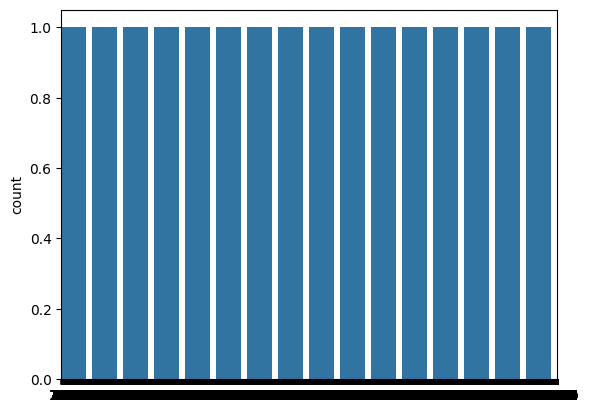

In [ ]:
sns.countplot(y_train)

In [ ]:
np.isnan(x_train).any()

False

In [ ]:
np.isnan(x_test).any()

False

In [ ]:
input_shape = (28,28,1)

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_train = x_train/255.0

x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
x_test = x_test/255.0

In [ ]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

tf.Tensor([0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)


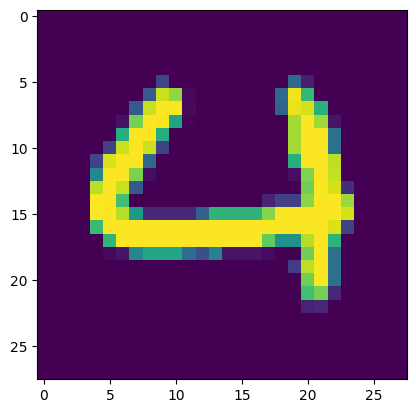

In [ ]:
plt.imshow(x_train[60][:,:,0])
print(y_train[60])

In [ ]:
batch_size = 32
no_class = 10
epochs = 6

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(no_class, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/6
1688/1688 [==============================] - 15s 6ms/step - loss: 0.1968 - acc: 0.9396 - val_loss: 0.0511 - val_acc: 0.9865
Epoch 2/6
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0739 - acc: 0.9792 - val_loss: 0.0348 - val_acc: 0.9908
Epoch 3/6
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0635 - acc: 0.9824 - val_loss: 0.0354 - val_acc: 0.9910
Epoch 4/6
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0608 - acc: 0.9843 - val_loss: 0.0312 - val_acc: 0.9920
Epoch 5/6
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0651 - acc: 0.9841 - val_loss: 0.0392 - val_acc: 0.9882
Epoch 6/6
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0691 - acc: 0.9836 - val_loss: 0.0332 - val_acc: 0.9920
